In [ ]:
!pip install tensor flow
!pip install keras

     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 3.1MB 6.7MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 296kB 32.9MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 235kB 32.3MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 13.7MB 295kB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
  Created wheel for tensor: filename=tensor-0.3.6-cp36-none-any.whl size=71570 sha256=4e163ada30077b92d4e8fe6d4f441227066541e7312cef4384a90e7acda103d2
  Stored in directory: /root/.cache/pip/wheels/32/ba/ac/dbd210e9db9e5d549b3d98c57713684c5768298f259b1925ef
  Created wheel for flow: filename=flow-0.0.1-cp36-none-any.whl size=7851 sha256=615a6a71eb4755761c1545b3c879cbb53f1a34bc7fb810a853af25580c9c15d8
  Stored in directory: /root/.cache/pip/wheels/15

**RAW DATA**

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt
import datetime as dt
plt.style.use('fivethirtyeight')




In [ ]:
start = dt.datetime(2012,1,30)
end = dt.datetime(2020,8,2)

In [ ]:
df=web.DataReader('INFY.NS',data_source='yahoo',start=start,end=end)
df



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-30,340.649994,336.250000,337.362000,339.037994,9588456.0,163.944412
2012-01-31,344.330994,338.250000,339.000000,343.250000,8658896.0,165.981171
2012-02-01,343.500000,336.955994,342.462006,342.837006,6269336.0,165.781448
2012-02-02,347.875000,341.250000,342.513000,344.625000,11538256.0,166.646057
2012-02-03,349.000000,342.506012,342.506012,347.906006,11637200.0,168.232590
...,...,...,...,...,...,...
2020-07-28,967.549988,941.200012,946.000000,962.849976,15818463.0,962.849976
2020-07-29,960.000000,943.599976,953.250000,954.150024,11152710.0,954.150024
2020-07-30,972.650024,958.750000,962.000000,961.450012,12492320.0,961.450012


In [ ]:
df.isna().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2092 entries, 2012-01-30 to 2020-08-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2092 non-null   float64
 1   Low        2092 non-null   float64
 2   Open       2092 non-null   float64
 3   Close      2092 non-null   float64
 4   Volume     2092 non-null   float64
 5   Adj Close  2092 non-null   float64
dtypes: float64(6)
memory usage: 114.4 KB


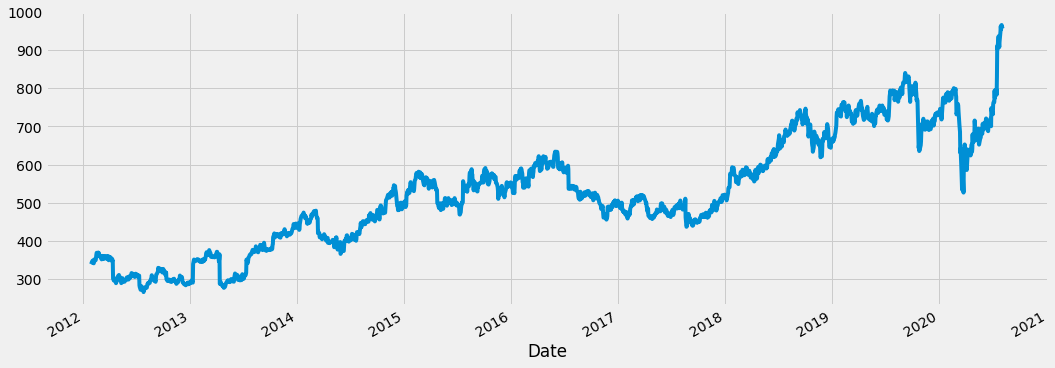

In [ ]:
df['Close'].plot(figsize=(16,6))

**7 DAY ROLLING MEAn**

In [ ]:
df.rolling(7).mean().head(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-30,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-02,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-07,346.709712,339.775857,343.586574,343.675999,8.978781e+06,166.187140
2012-02-08,347.723999,340.692858,344.463431,344.691145,8.562072e+06,166.678020
2012-02-09,348.928571,341.154428,345.124146,345.832145,8.776064e+06,167.229754


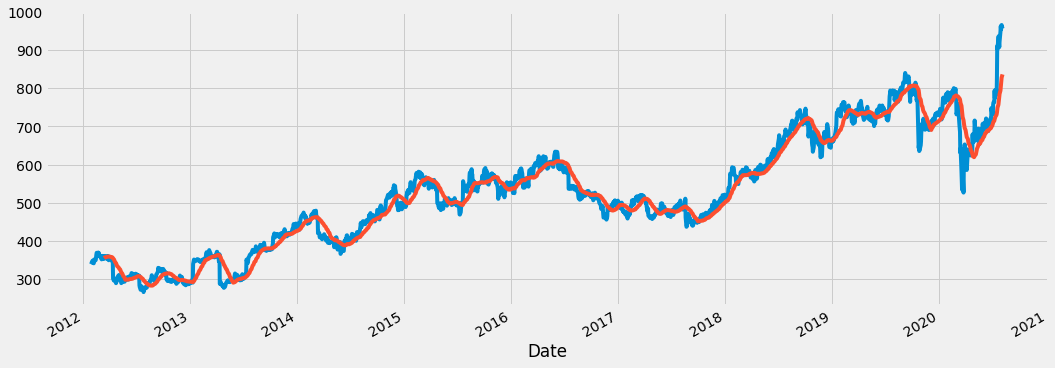

In [ ]:
df['Close'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Close'].plot()

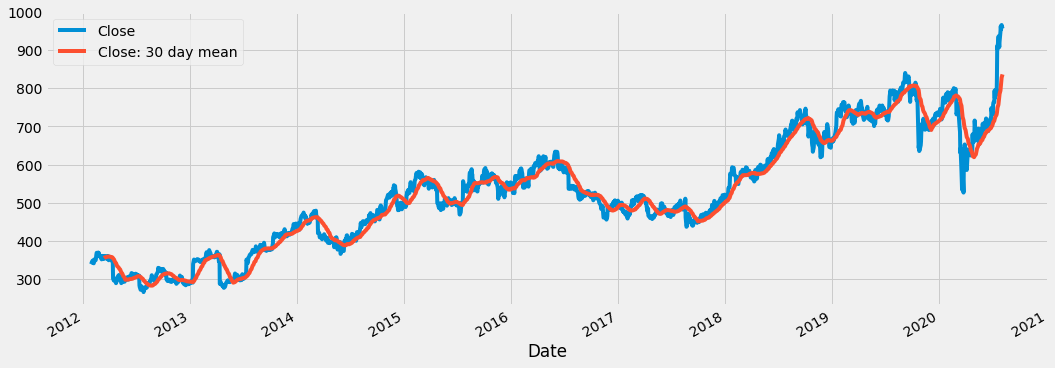

In [ ]:
df['Close: 30 day mean']=df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 day mean']].plot(figsize=(16,6))

**OPTIONALLY SPECIFY MIN NO OF PERIODS**

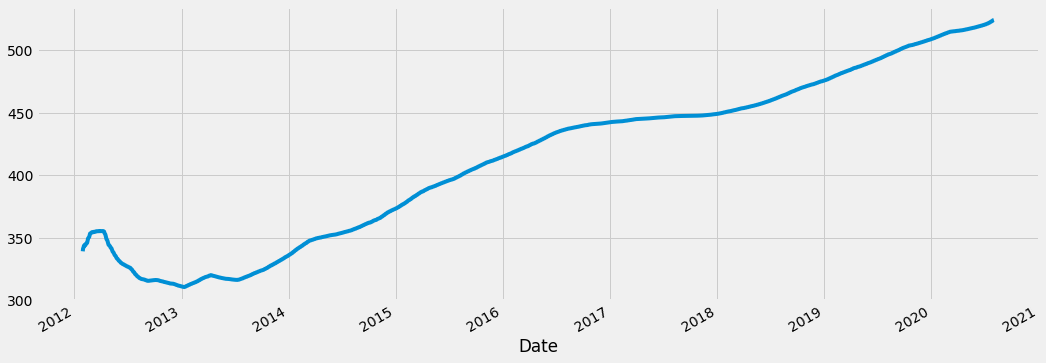

In [ ]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))


**DATA PREPROCESSING**

In [ ]:
training_set=df['Close']
training_set=pd.DataFrame(training_set)


In [ ]:
#Data Cleaning
df.isna().any()

High                  False
Low                   False
Open                  False
Close                 False
Volume                False
Adj Close             False
Close: 30 day mean     True
dtype: bool

**FEATURE SCALING** 

In [ ]:
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)


In [ ]:
df.shape


(2092, 7)

**CREATING A STRUCTURE WITH 60 TIME STEPS AND 1 OUTPUT**

In [ ]:
x_train=[]
y_train=[]
for i in range(60,(df.shape[0])):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

#Reshaping
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2032, 60, 1)

**BUILDING THE RNN MODEL**

In [ ]:
#initialising the RNN
regressor=Sequential()


In [ ]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))



#Adding output layer
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
64/64 [==============================] - 5s 83ms/step - loss: 0.0123
Epoch 2/100
64/64 [==============================] - 6s 87ms/step - loss: 0.0035
Epoch 3/100
64/64 [==============================] - 6s 88ms/step - loss: 0.0029
Epoch 4/100
64/64 [==============================] - 6s 87ms/step - loss: 0.0028
Epoch 5/100
64/64 [==============================] - 6s 88ms/step - loss: 0.0027
Epoch 6/100
64/64 [==============================] - 6s 88ms/step - loss: 0.0023
Epoch 7/100
64/64 [==============================] - 6s 88ms/step - loss: 0.0024
Epoch 8/100
64/64 [==============================] - 6s 90ms/step - loss: 0.0024
Epoch 9/100
64/64 [==============================] - 6s 88ms/step - loss: 0.0022
Epoch 10/100
64/64 [==============================] - 6s 90ms/step - loss: 0.0022
Epoch 11/100
64/64 [==============================] - 6s 87ms/step - loss: 0.0020
Epoch 12/100
64/64 [==============================] - 6s 88ms/step - loss: 0.0020
Epoch 13/100
64/64 [=====

**MAKING PREDICTIONS AN D VISUALISATION**

In [ ]:
start = dt.datetime(2020,7,2)
end = dt.datetime(2020,8,17)
df_test=web.DataReader('INFY.NS',data_source='yahoo',start=start,end=end)

real_stock_price=df_test.iloc[:,1:2].values
df_test

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-02,765.450012,735.400024,737.349976,756.599976,17263756,756.599976
2020-07-03,764.000000,752.500000,755.000000,762.700012,7796572,762.700012
2020-07-06,775.000000,761.500000,765.200012,764.000000,8810958,764.000000
2020-07-07,796.950012,765.549988,769.400024,794.150024,19362533,794.150024
2020-07-08,784.900024,772.200012,784.900024,774.700012,8476642,774.700012
2020-07-09,790.000000,775.000000,780.000000,781.700012,6854166,781.700012
2020-07-10,789.900024,773.500000,773.500000,781.849976,5206452,781.849976
2020-07-13,805.349976,786.049988,788.000000,797.049988,10804688,797.049988
2020-07-14,806.400024,781.349976,792.950012,783.250000,8961822,783.250000


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 2020-07-02 to 2020-08-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       33 non-null     float64
 1   Low        33 non-null     float64
 2   Open       33 non-null     float64
 3   Close      33 non-null     float64
 4   Volume     33 non-null     int64  
 5   Adj Close  33 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.8 KB


In [ ]:
df_test['Volume']=df_test['Volume'].astype(float)
#if any column is not in float

In [ ]:
test_set=df_test['Close']
test_set=pd.DataFrame(test_set)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 2020-07-02 to 2020-08-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   33 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


In [ ]:
df_test.shape

(33, 6)

In [ ]:
df_total=pd.concat((df['Close'],df_test['Close']),axis=0)
inputs=df_total[len(df_total)-len(df_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,(df_test.shape[0])+60):
  x_test.append(inputs[i-60:i,0])

x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)   #unscale values so that prediction values match y_test dataset
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price

,0
0,942.723999
1,779.793762
2,753.386169
3,757.520203
4,784.119019
5,774.262756
6,774.314636
7,774.446472
8,786.373352
9,778.603333


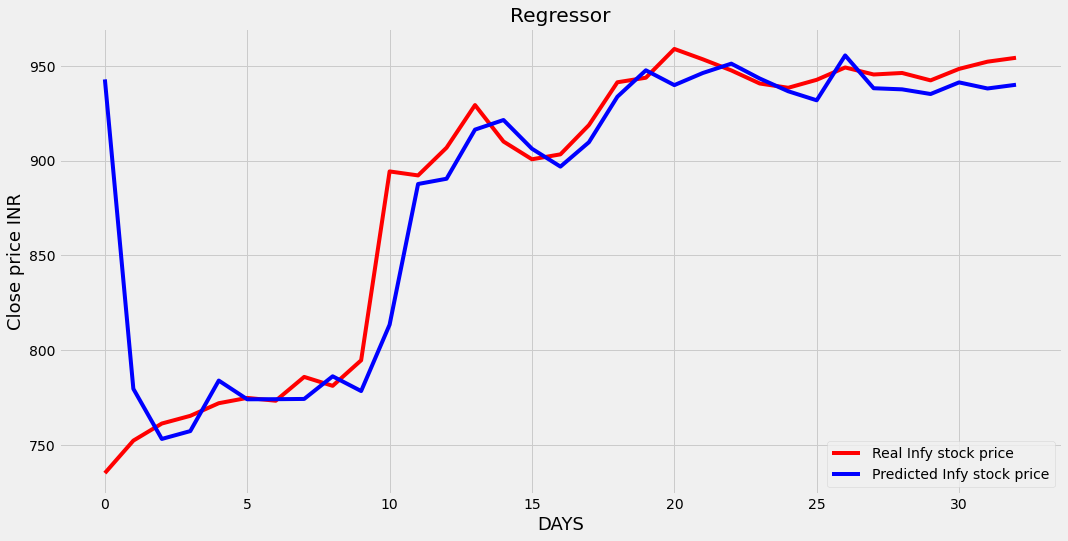

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Regressor')
plt.xlabel('DAYS',fontsize=18)
plt.ylabel('Close price INR', fontsize=18)
plt.plot(real_stock_price,color='red',label='Real Infy stock price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Infy stock price')

plt.legend()
plt.show()

In [ ]:
#get the root mean squared error to evaluate model lower the value better the fit
rmse=np.sqrt(np.mean(predicted_stock_price-real_stock_price)**2)
rmse

0    0.183437
dtype: float64